# Content IQ Data Project:
### Web scraping and FB engagement

By: Jinting Hang

Questions:
1. Find the site’s sitemap, e.g. http://www.boredpanda.com/sitemap.xml
2. Use FB graph Restful API to collect all of the available information on each of the stories
(links) in the sitemap (engagement measures such as likes, shares, comments, and
other data such as title, description, type, etc.).
3. Analyze the keyword density on the titles of these stories
4. Present in a graph the top meaningful keywords and the engagement level for stories
that include them.

# Index
* [Answer question 1](#Answer-question-1)
* [Answer question 2](#Answer-question-2)
* [Answer question 3](#Answer-question-3)
* [Answer question 4](#Answer-question-4)
* [Summary](#Summary)

# Answer question 1
<span style='color:blue'>Find the site’s sitemap, e.g. http://www.boredpanda.com/sitemap.xml.</span>

In [157]:
import numpy as np
import pandas as pd
from collections import Counter
import requests
import urllib.request
import time
from bs4 import BeautifulSoup
import facebook
import time 
from os import path
import glob
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
### loading the sitemap of links, putting it into one variable dest
url = 'https://www.boredpanda.com/sitemap.xml'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'xml')
dest = soup.findAll('loc')
len(dest)

22098

In [14]:
type(dest)

bs4.element.ResultSet

In [15]:
dest = [str(x)[5:-6] for x in dest]

In [17]:
## observe 5 samples 
dest[:5]

['https://www.boredpanda.com/',
 'https://www.boredpanda.com/?show=trending',
 'https://www.boredpanda.com/im-fat-because-food-is-my-comfort/',
 'https://www.boredpanda.com/neighbor-cats-falls-in-love-simon-theo/',
 'https://www.boredpanda.com/baby-fox-showed-up-grandmothers-house/']

In [20]:
import pickle

with open('listfile.data', 'wb') as filehandle:  
    # store the data as binary data stream
    pickle.dump(dest, filehandle)

# Answer question 2
<span style='color:blue'>Use FB graph Restful API to collect all of the available information on each of the stories
(links) in the sitemap (engagement measures such as likes, shares, comments, and
other data such as title, description, type, etc.)</span>

In [22]:
graph = facebook.GraphAPI(access_token= "EAAJJkPfeDOEBAOA7lwc5cYDLW8vOEo5Uqqa7EkOJBCncRmyfHDjOKYuXZBxZCdMhZBWoBQZBSqiZAjT7ieFrJjpAVAZAk54EU3Rm4VXIwFfdXuZBRrOuOZBDuUUXZCH5UJJYdeFntc84tCPfKJZAnvKsdxEgm8Dz546UOaSBZBZAU50MyAZDZD", version = "2.12")

## original trial: use map function to map out whole data into a dataframe (without considering the call limit set by FB)

In [21]:
### original trial: use map function to map out whole data into a dataframe (without considering the call limit set by FB)

"""
def destination(df):
    url = df.values[0]
    site_info = graph.get_object(id = url, fields = 'og_object')['og_object']
    X = site_info.copy()
    site_info2 = graph.get_object(id = url, fields= 'engagement')['engagement']
    X.update(site_info2)
    return pd.Series(X)
        

df_sitemap = pd.DataFrame(dest)
df_sitemap.apply(destination)
"""

"\ndef destination(df):\n    url = df.values[0]\n    site_info = graph.get_object(id = url, fields = 'og_object')['og_object']\n    X = site_info.copy()\n    site_info2 = graph.get_object(id = url, fields= 'engagement')['engagement']\n    X.update(site_info2)\n    return pd.Series(X)\n        \n\ndf_sitemap = pd.DataFrame(dest)\ndf_sitemap.apply(destination)\n"

In [16]:
df_sitemap.sample(10)

,comment_count,comment_plugin_count,description,id,reaction_count,share_count,title,type,updated_time
0,362,0,"Bored Panda is a leading art, design and photo...",157086864440757,2385,5350,Bored Panda,article,2019-04-27T11:29:09+0000
1,362,0,"Bored Panda is a leading art, design and photo...",157086864440757,2385,5350,Bored Panda,article,2019-04-27T11:29:09+0000
2,1,0,I’ve always been a chubby kid and wanted to lo...,2298950946831680,6,10,I’m Fat Because Food Is My Comfort,article,2019-04-25T19:58:50+0000
3,4,0,This week Twitter had a collective ‘aww’ momen...,2059791284147916,26,19,Cat Owners Communicate Through Window Notes To...,article,2019-04-26T18:03:29+0000
4,2219,0,"Spring has well and truly sprung, getting now ...",2350155425046505,17671,2655,Baby Foxes Show Up At Person’s House And Their...,article,2019-04-26T19:43:37+0000
5,1425,0,Each time the victim of sexual violence gets a...,2133288573385589,10801,3198,Victims Who Were Told That Their Clothing Got ...,article,2019-04-27T00:46:07+0000
6,8168,0,Rob Rogalski’s whimsical art enraptures. His m...,2159814347468200,45920,8830,"Man Creates Indoor Fake Tree For A Cat, And Th...",article,2019-04-27T15:12:10+0000
7,0,0,I had a passion to work on a graphic design pr...,2293657464047461,0,0,Egyptian Banknotes In 3D,article,2019-04-26T13:18:16+0000
8,2489,0,Art students at Pensacola Christian College ar...,2567654883262307,5452,1449,Student Shares Pics From Art Book In His Forme...,article,2019-04-27T17:09:27+0000
9,1,0,Original Blade Runner is one of my all time fa...,1643122102456910,41,1,"May I Ask You A Personal Question, Have You Ev...",article,2019-04-27T23:13:01+0000


## second trial: since facebook has limit of 110 calls per hour, I will split the whole calls into 200 calls, each time save an intermediate result csv.

In [ ]:
#### second trial: since facebook has limit of 110 calls per hour, I will split the whole calls into 200 calls, 
### each time save an intermediate result csv. 

def destination(dest):
    # get the number of destination urls
    n = len(dest)
    fail_urls = []
    for i in range(n):
        url = dest[i]
        if i % 10 == 0:
            print(i)
        if i % 110 == 0 and i != 0:
            time.sleep(3600)
        try:
            # call FB api to get information frome each url
            site_info = graph.get_object(id = url, fields = 'og_object')['og_object']
            X = site_info.copy()
            site_info2 = graph.get_object(id = url, fields='engagement')['engagement']
            X.update(site_info2)
            destination_list = []
            destination_list.append(X)
            df_destination = pd.DataFrame(destination_list)
            # for each url, save the result into a csv file (or json file)
            df_destination.to_csv('result_csv_files/result_dictionary{}.csv'.format(i))


        except:
            print("This link is broken %d"%i)
            fail_urls.append(i)
    return fail_urls

In [ ]:
# call the destination function, it should save each url search result into a csv file, also return the id of failed 
# urls, so we can make a secondary attempt only on those failed urls.

fail_urls = destination(dest)

# Answer question 3
<span style='color:blue'>Analyze the keyword density on the titles of these stories</span>

In [166]:
### due to the limited rate of getting the data, we will only choose the first 1000 links and analyze the titles
def extract_titles(relative_path):
    titles = []
    path = relative_path + '/*.csv'
    for filename in glob.glob(path):
        df_dic = pd.read_csv(filename)
        if 'title' not in df_dic: continue
        titles.append(df_dic['title'].values[0])
    return titles

In [167]:
rpath = 'result_csv_files/'
titles = extract_titles(rpath)

In [168]:
T_titles = ' '.join([title for title in titles])
print('* There are {} words in the combination of titles'.format(len(T_titles)))

* There are 72214 words in the combination of titles


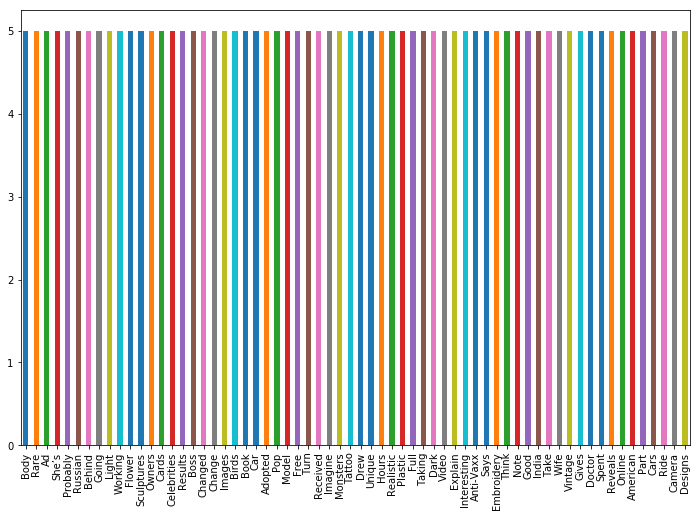

In [170]:
# count the frequency of each word, choose the top frequency words to plot
dic = pd.Series([word.strip('(') for title in titles for word in title.split()]).value_counts()
dic = dic[(dic.values < 6) & (dic.values > 4)  & (dic.index.str.isnumeric() == False)] 
plt.figure(figsize = (12, 8))
dic.plot(kind = 'bar')

plt.show()


We can see that if we directly plot out the frequency of each word, a lot of stopword will also be counted. We should set a better stopword filter to remove meanless words.

# Answer question 4

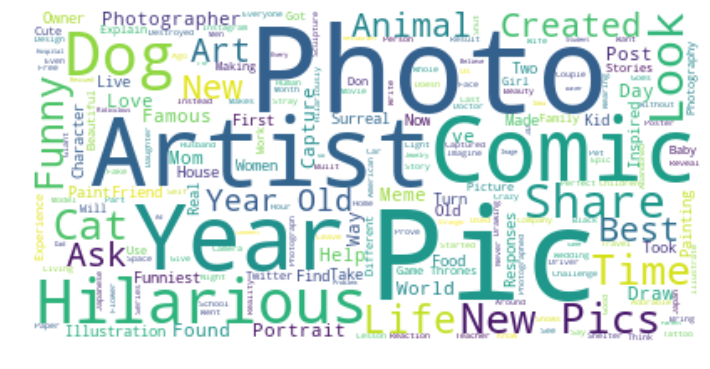

In [176]:
# create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(['Bored', 'Panda', 'People', 'Make', 'Man', 'Woman', 'Guy', 'Gets', 'One', 'Using', 'Thing', 
                  'Someone', 'Things', 'Show', 'Create'])
# Generate a word cloud image
wordcloud = WordCloud(stopwords = stopwords, background_color = 'white').generate(T_titles)
plt.figure(figsize = (12,8))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [177]:
wordcloud.to_file('imgcloud/importance_title_words.png')

# Summary

* After analyzing the first 100 titles, we have found out that the hottest topics people talk about are: artist, love, pics, Comic, Dog, Game of Thrones, etc.
* If I am given more time, I will download all data and get a better statistics of the frequency of words.
* Also, I will analyze the likes and comments related to each post, and depending on their popularity, we will increase the number of popular type posts, also increase the ads fee related to those posts, to make a bigger profit.
* To summarize, the hardest part is not analyzing the data, but gathering data. FB api has a strict limit of 110 calls per hour. To solve this, we can create several new apps, and get several tokens, and use them to download data simutaneously. 
